## Importing the CSV File containing the data

Using Pandas for reading the CSV file. Benchmarks showed it to be the fastest!

In [49]:
import pandas

In [50]:
filename = "Instant_1486487317325.csv"
csvDelimiter = ','

def open_with_pandas_read_csv(filename):
    df = pandas.read_csv(filename, sep=csvDelimiter, header=0)
    return df

dataFrame = open_with_pandas_read_csv(filename)

In [51]:
print dataFrame.head()
headers = dataFrame.columns
data = dataFrame.values

           Date  Device Minute  Unlock Count  Instant  Android Settings  \
0   Apr 7, 2016            202            83        1                 0   
1   Apr 8, 2016            381            99        1                 1   
2   Apr 9, 2016            270            79        2                 0   
3  Apr 10, 2016            339            82        0                 2   
4  Apr 11, 2016            206            81        1                 0   

   WhatsApp  Slack  Inbox  Chrome  File Manager    ...     Piazza  Legends TD  \
0         6      1      0       1             0    ...          0           0   
1       144      1      3       8             0    ...          0           0   
2       121      1      3       0             0    ...          0           0   
3        30      2      3       2             0    ...          0           0   
4        34      0      4       8             0    ...          0           0   

   Sound Recorder  Bose  Walking Time  Running Time  Traveling

In [52]:
print type(data), data.size

<type 'numpy.ndarray'> 33136


## Exploratory Data Analysis (EDA).

Separating the following fields and plotting the data.
- Device Minute
- Unlock Count

Using the Python libraries Seaborn for data visualisation.
Libraries suggested by Abhishek Juneja (https://github.com/darth-dodo)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

Plotting a Scatter Matrix

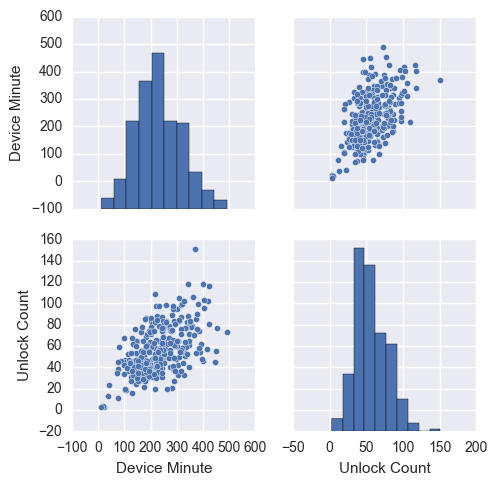

In [54]:
dataFrameToPlot = dataFrame[[headers[1], headers[2]]]

sns.pairplot(dataFrameToPlot)
sns.plt.show()

Plotting a Correlation Heatmap

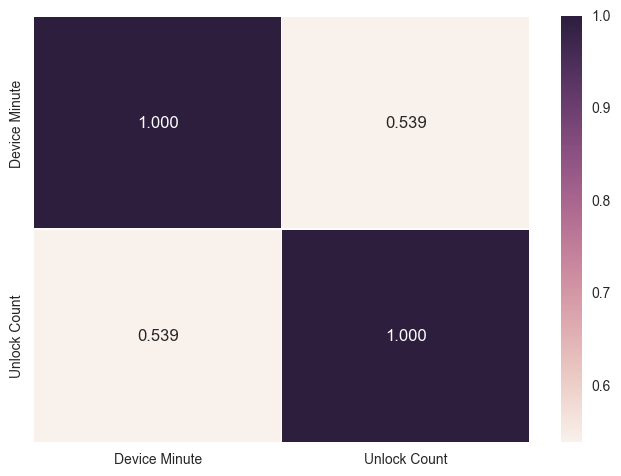

In [55]:
correlationToPlot = dataFrameToPlot.corr()

sns.heatmap(correlationToPlot, annot=True, fmt=".3f", linewidths=.3)
sns.plt.show()

Adding Time at Home (= India Home + USA Home) attribute to see how it affects the plot! Scatter Matrix with time at home included.

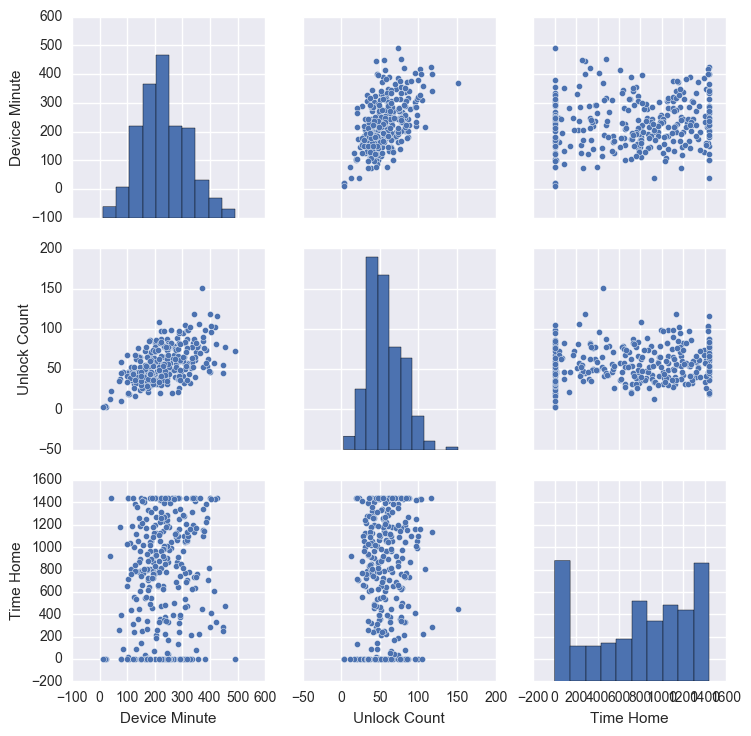

In [56]:
tempList = [headers[-2], headers[-1]]
dataFrameToPlotNew["Time Home"] = dataFrame[tempList].sum(axis=1)
del tempList

sns.pairplot(dataFrameToPlotNew)
sns.plt.show()

Plotting new correlation heatmap

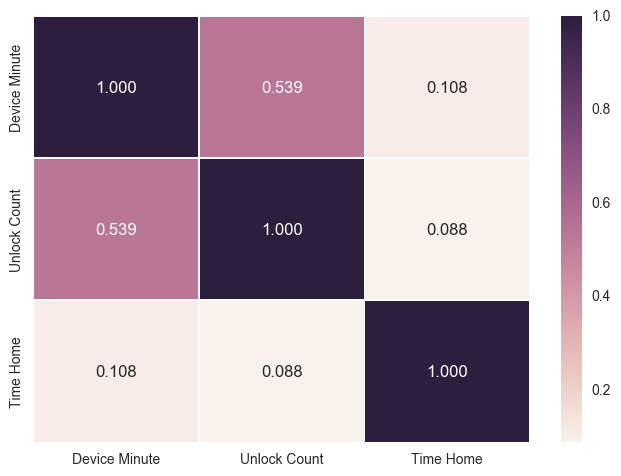

In [57]:
correlationToPlotNew = dataFrameToPlotNew.corr()

sns.heatmap(correlationToPlotNew, annot=True, fmt=".3f", linewidths=.3)
sns.plt.show()

In [58]:
dates = data[ :, 0]
deviceMinutes = data[ :, 1]
unlockCount = data[ :, 2]
walkingTime = data[ :, -6]
travelTime = data[ :, -4]
steps = data[ :, -3]
indiaHomeTime = data[ :, -2]
usaHomeTime = data[ :, -1]

assert len(dates) == len(deviceMinutes) == len(unlockCount) == 304
assert len(walkingTime) == len(travelTime) == len(steps) == 304
assert len(indiaHomeTime) == len(usaHomeTime) == 304

print "Number of instances: ", len(dates)

Number of instances:  304
